<a href="https://colab.research.google.com/github/jose-luis-hernandez-amaya/Simulaci-n-1/blob/main/Prueba_de_frecuencias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Las hipotesis son:

$$H_0 : X_n ∼ U(0,1) \\ H_1 : X_n \nsim U(0,1)$$

Para el estadistico de prueba:

$$\chi = \frac{(f_o-f_e)^2}{f_e}$$

Sirve para verificar la propiedad de uniformidad.
Su objetivo principal es asegurarse de que el generador no tenga "números favoritos" ni zonas vacías, sino que distribuya los valores de manera equitativa a lo largo de todo el intervalo de 0 1

In [ ]:
data = [
0.78961, 0.05230, 0.10699, 0.55877, 0.14151,
0.76086, 0.12079, 0.27738, 0.65726, 0.79269,
0.80548, 0.82654, 0.29453, 0.20852, 0.42989,
0.58518, 0.98611, 0.34488, 0.34358, 0.11537,
0.89898, 0.57880, 0.67621, 0.05010, 0.00121,
0.28269, 0.73059, 0.70119, 0.18284, 0.49962,
0.38618, 0.76910, 0.68334, 0.55170, 0.10850,
0.79882, 0.45679, 0.21631, 0.87616, 0.55743,
0.58962, 0.33216, 0.03185, 0.61168, 0.09264,
0.69623, 0.17028, 0.05475, 0.91512, 0.76262,
0.29931, 0.30861, 0.83358, 0.51781, 0.03272,
0.57410, 0.26593, 0.85903, 0.43308, 0.35286,
0.24000, 0.65559, 0.38507, 0.90829, 0.94187,
0.93655, 0.88809, 0.81772, 0.36982, 0.19904,
0.54325, 0.62400, 0.09133, 0.41678, 0.33954,
0.58244, 0.85853, 0.86752, 0.38729, 0.15506,
0.23949, 0.53559, 0.33381, 0.49883, 0.75103,
0.19962, 0.65002, 0.74579, 0.79113, 0.63453,
0.19147, 0.40644, 0.08128, 0.73435, 0.22724,
0.22287, 0.07281, 0.64183, 0.44267, 0.72102
]

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as st

In [ ]:
def prueba_chi_cuadrada(data, alfa):
    N = len(data)

    bins = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
    etiquetas_intervalos = ["[0 - 0.2)", "[0.2 - 0.4)", "[0.4 - 0.6)", "[0.6 - 0.8)", "[0.8 - 1.0]"]

    fo, _ = np.histogram(data, bins=bins)  #f_o Frecuencia Observada

    fe = np.full(5, N / 5)  #f_e Frecuencia Esperada

    chi_componentes = ((fo - fe) ** 2) / fe  #(f_o - f_e)^2 / f_e

    chi_2_calc = np.sum(chi_componentes) #Estadistico x^2 a calcular


    tabla = pd.DataFrame({
        "Intervalo": etiquetas_intervalos,
        "f_o (Frecuencia Observada)": fo,
        "f_e (Frecuencia esperada)": fe,
        "(f_o - f_e)^2 / f_e": chi_componentes
    })

    print(f"Estadístico X^2 calculado: {chi_2_calc:.4f}\n")

    grados_libertad = len(bins) - 1  #k es el número de intervalos (5)

    chi_2_critico = st.chi2.ppf(1 - alfa, grados_libertad)      # Valor crítico de las tablas de Chi-cuadrada

    print(f"X^2 crítico (alfa={alfa}): {chi_2_critico:.4f}")

    if chi_2_calc < chi_2_critico:
        print("Conclusión: No se rechaza H_0. La muestra parece provenir de una distribución U(0,1)")
    else:
        print("Conclusión: Se rechaza H_0. La muestra NO proviene de una distribución U(0,1)")

    return tabla

prueba_chi_cuadrada(data, 0.05)

Estadístico X^2 calculado: 2.0000

X^2 crítico (alfa=0.05): 11.0705
Conclusión: No se rechaza H_0. La muestra parece provenir de una distribución U(0,1)


,Intervalo,f_o (Frecuencia Observada),f_e (Frecuencia esperada),(f_o - f_e)^2 / f_e
0,[0 - 0.2),21,20.0,0.05
1,[0.2 - 0.4),22,20.0,0.20
2,[0.4 - 0.6),19,20.0,0.05
3,[0.6 - 0.8),23,20.0,0.45
4,[0.8 - 1.0],15,20.0,1.25


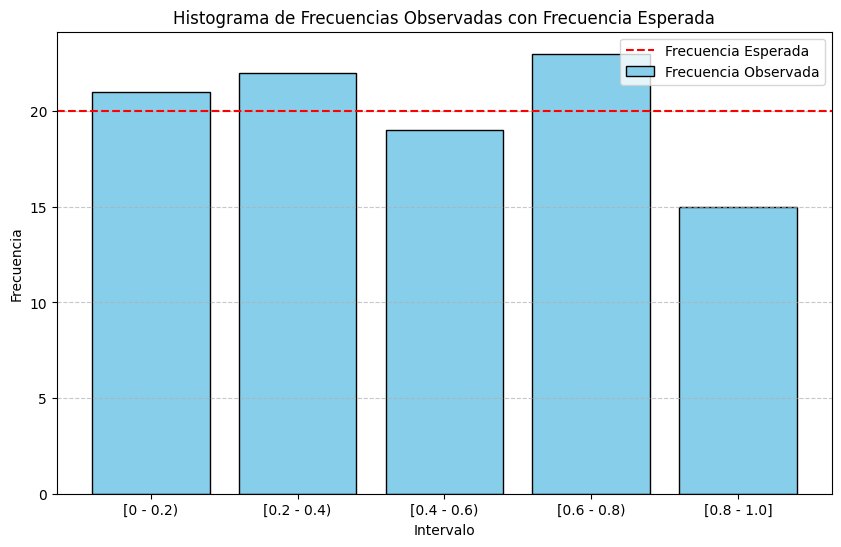

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

bins = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
etiquetas_intervalos = ["[0 - 0.2)", "[0.2 - 0.4)", "[0.4 - 0.6)", "[0.6 - 0.8)", "[0.8 - 1.0]"]

fo, _ = np.histogram(data, bins=bins)


N = len(data)
num_bins = len(bins) - 1
fe_value = N / num_bins

plt.figure(figsize=(10, 6))
plt.bar(etiquetas_intervalos, fo, color='skyblue', edgecolor='black', label='Frecuencia Observada')
plt.axhline(y=fe_value, color='red', linestyle='--', label='Frecuencia Esperada')
plt.title('Histograma de Frecuencias Observadas con Frecuencia Esperada')
plt.xlabel('Intervalo')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

Con la gráfica podemos ver como se reparten los numeros mayormente equitativamente